# Load Data

In [1]:
from LoadData import outcomes_df, projects_df, donors_choose_df

In [2]:
import pandas as pd
import numpy as np
# TO DEBUG:  import pdb

In [3]:
import CleaningFunctions as cf
import ExplorationFunctions as ef
import LoadData as ld
from Variables import *
import PipelineFunctions as pf

/Users/akoko0530/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/akoko0530/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [4]:
remove_from_projects = GEO_VARIABLES + ID_VARIABLES + IDX
keep_vars = [x for x in projects_df.columns if x not in remove_from_projects]
labeled_df = donors_choose_df[keep_vars + TARGET_VARIABLES]
# labeled_df['date_posted'] = pd.to_datetime(labeled_df['date_posted'])
    # with more time, would want to get temporal splits funct to work using datetime module
labeled_df = cf.change_to_1_0(labeled_df)
labeled_df = cf.impute_mean(labeled_df, given_cols=CONTINUOUS_VARIABLES)

/Users/akoko0530/Documents/GitHub/MachineLearning_CAPP30254/Homework_3/CleaningFunctions.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/akoko0530/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
#remove outliers
for var in CONTINUOUS_VARIABLES:
    labeled_df = cf.zscore_remove_outlier(labeled_df, var)
#discretize
for var in CONTINUOUS_VARIABLES:
    labeled_df = cf.discretize(labeled_df, var, 10, want_quantile=False)

In [6]:
dum_variables_of_interest = [
'poverty_level', 
'teacher_prefix',
'primary_focus_area']

In [7]:
labeled_df = cf.dummytize(labeled_df, dum_variables_of_interest)

In [8]:
features = ['school_nlns', 'school_kipp',
            'fulfillment_labor_materials',
            'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
            'high poverty', 'highest poverty', 'low poverty','moderate poverty', 
            'Dr.', 'Mr.', 'Mrs.', 'Ms.', 
            'Applied Learning','Health & Sports', 'History & Civics', 
            'Literacy & Language','Math & Science', 'Music & The Arts', 'Special Needs']
target = TARGET_VARIABLES

In [9]:
labeled_df = labeled_df[features + CONTINUOUS_VARIABLES + DATE_VARIABLE + target]

In [10]:
cf.has_na(labeled_df)

[]

no rows to drop

# Simple Loop & Temporal Validation

In [11]:
from __future__ import division
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from scipy import optimize
import time
import seaborn as sns
%matplotlib inline

# from sklearn.metrics import precision_recall_curve


In [ ]:
First

In [12]:
X_train, X_test, y_train, y_test = pf.create_temporal_split_dfs(labeled_df, 
                                                                features, target, 2)

x_train min: 2011-01-01 , x_train max:  2012-06-30
y_train min: 2011-01-01 , y_train max:  2012-06-30
x_test min: 2012-07-01 , x_test max:  2012-12-31
y_test min: 2012-07-01 , y_test max:  2012-12-31


RF


<Figure size 432x288 with 0 Axes>

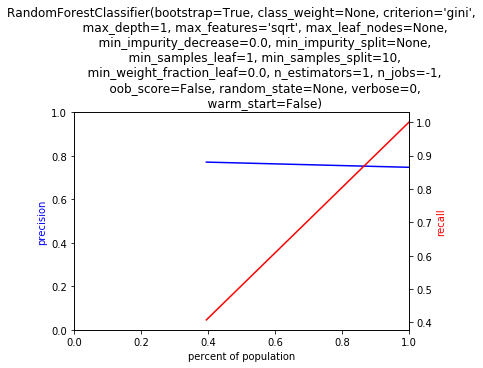

DT


<Figure size 432x288 with 0 Axes>

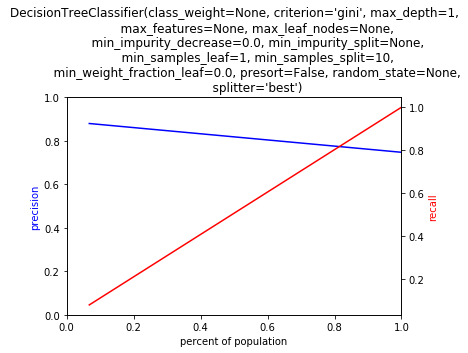

KNN


<Figure size 432x288 with 0 Axes>

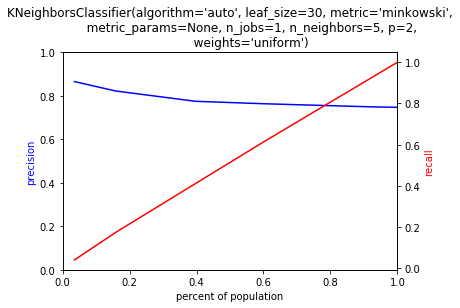

AB


<Figure size 432x288 with 0 Axes>

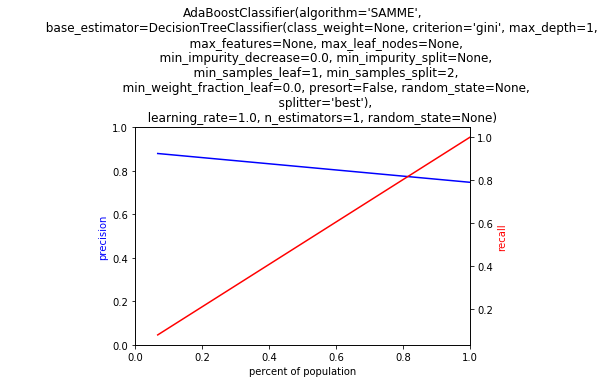

LR


<Figure size 432x288 with 0 Axes>

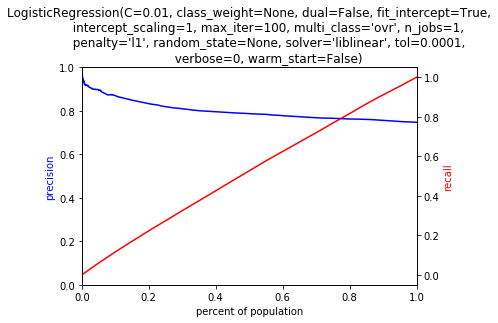

NB


<Figure size 432x288 with 0 Axes>

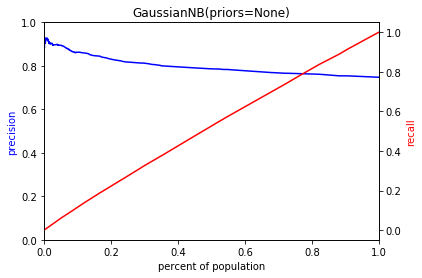

BAGGING


<Figure size 432x288 with 0 Axes>

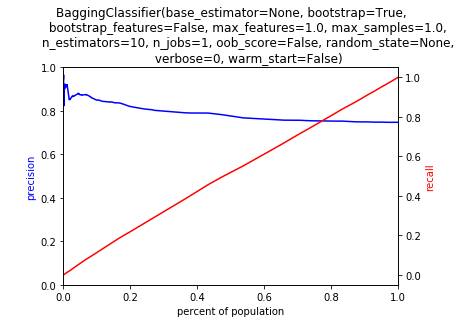

,model_type,clf,parameters,auc-roc,baseline,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,r_at_1,r_at_2,r_at_5,r_at_10,r_at_20,r_at_30,r_at_50
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.524966,0.747365,1.000000,1.000000,1.000000,0.987821,0.548149,0.698766,0.819265,0.013362,0.026746,0.066898,0.132167,0.146681,0.280478,0.548093
1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.523670,0.747365,1.000000,0.859464,0.837610,0.918805,0.959402,0.972935,0.983761,0.013362,0.022988,0.056035,0.122933,0.256730,0.390527,0.658142
2,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.541540,0.747365,0.891057,0.761982,0.904839,0.717278,0.850844,0.701743,0.821052,0.011907,0.020380,0.060532,0.095970,0.227681,0.281673,0.549288
3,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 1}",0.523670,0.747365,1.000000,0.859464,0.837610,0.918805,0.959402,0.972935,0.983761,0.013362,0.022988,0.056035,0.122933,0.256730,0.390527,0.658142
4,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",0.575411,0.747365,0.923577,0.913079,0.893797,0.869601,0.825187,0.817311,0.787276,0.012341,0.024422,0.059794,0.116350,0.220815,0.328061,0.526692
5,NB,GaussianNB(priors=None),{},0.573015,0.747365,0.920325,0.903331,0.890874,0.862943,0.829652,0.814442,0.788575,0.012298,0.024161,0.059598,0.115459,0.222010,0.326909,0.527561
6,BAGGING,"(DecisionTreeClassifier(class_weight=None, cri...",{},0.549830,0.747365,0.913821,0.853777,0.871387,0.850114,0.823319,0.806593,0.792082,0.012211,0.022835,0.058294,0.113743,0.220315,0.323759,0.529908


In [13]:
pf.go_function(X_train, X_test, y_train, y_test['fully_funded'])